In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import lightgbm
import bisect
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

mpl.rc('font', family='Malgun Gothic')

path = "../"
pd.set_option("display.max_columns", 30)

In [4]:
df = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+'test.csv')

C:\Users\dohyeong\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\dohyeong\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


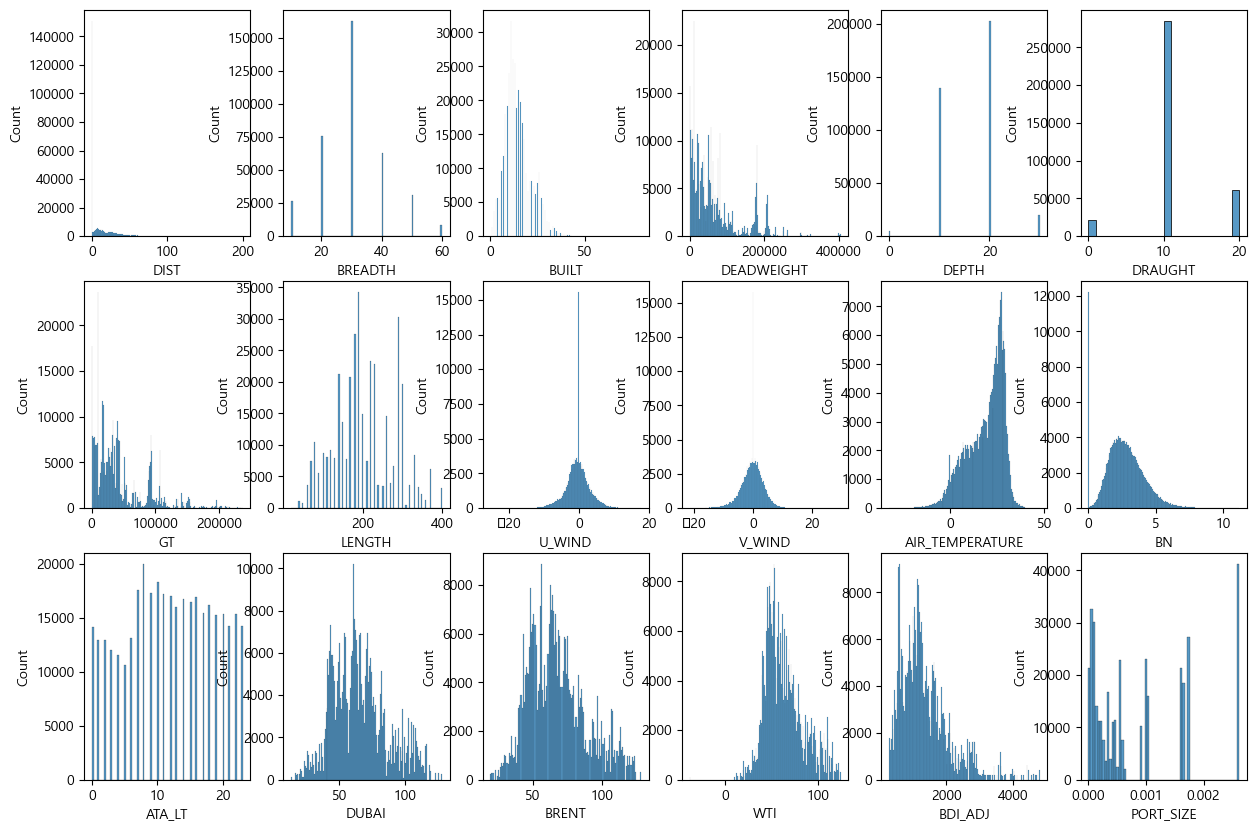

In [5]:
cols = ['DIST', 'BREADTH', 'BUILT', 'DEADWEIGHT', 'DEPTH', 'DRAUGHT', 'GT', 'LENGTH', 'U_WIND', 'V_WIND', 'AIR_TEMPERATURE', 'BN', 'ATA_LT', 'DUBAI', 'BRENT', 'WTI', 'BDI_ADJ', 'PORT_SIZE']

fig, ax = plt.subplots(3, 6)
fig.set_size_inches((15, 10))
dflist = cols
colors = ['black', 'blue', 'red', 'green']
k = 0
for i in range(0, 3):
    for j in range(0, 6):
        sns.histplot(df[dflist[k]], ax=ax[i, j])
        k += 1

C:\Users\dohyeong\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\dohyeong\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


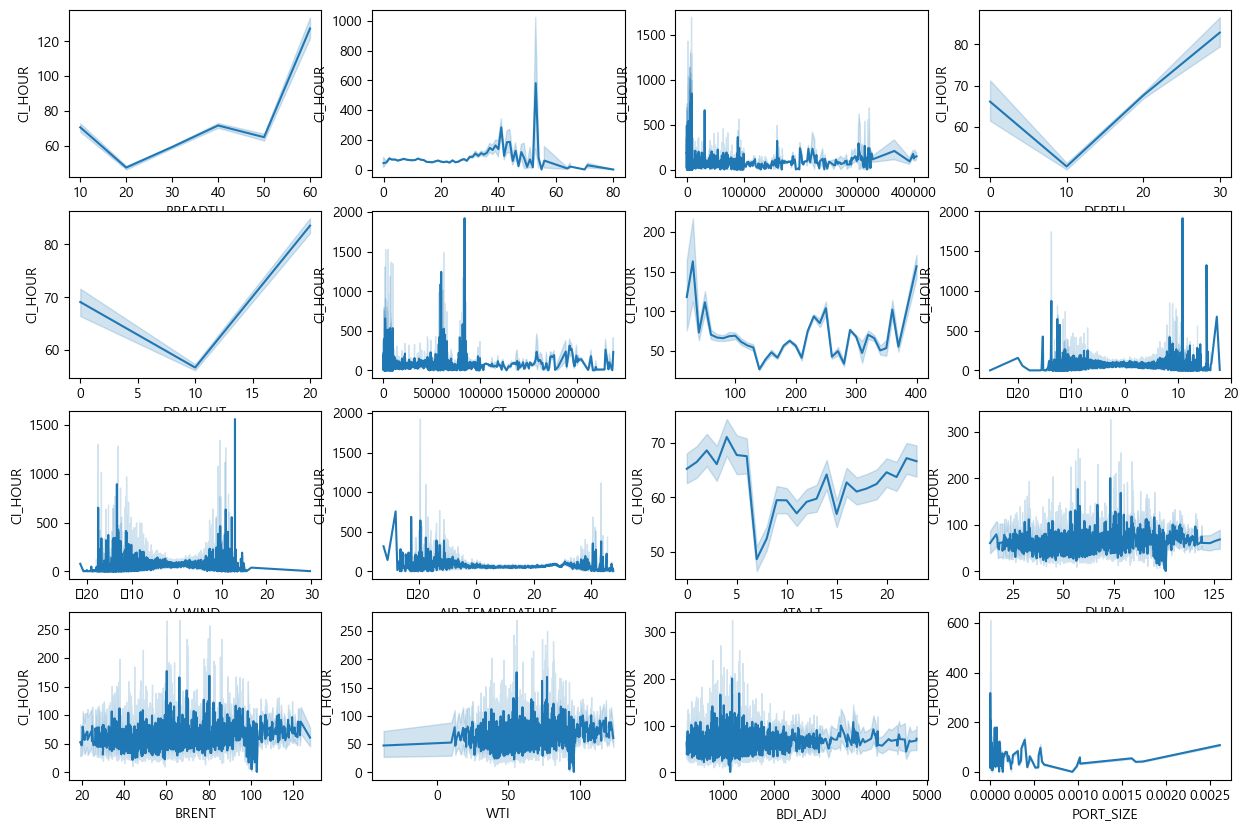

In [8]:
fig, ax = plt.subplots(4, 4)
fig.set_size_inches((15, 10))
dflist = ['BREADTH', 'BUILT', 'DEADWEIGHT', 'DEPTH', 'DRAUGHT', 'GT', 'LENGTH', 'U_WIND', 'V_WIND', 'AIR_TEMPERATURE', 'ATA_LT', 'DUBAI', 'BRENT', 'WTI', 'BDI_ADJ', 'PORT_SIZE']
colors = ['black', 'blue', 'red', 'green']
k = 0
for i in range(0, 4):
    for j in range(0, 4):
        sns.lineplot(x = df[dflist[k]], y = df['CI_HOUR'], ax=ax[i, j])
        k += 1

In [9]:
df['DIST'].describe()

count    367441.000000
mean         19.315929
std          30.903272
min           0.000000
25%           0.000000
50%           6.929929
75%          25.693063
max         199.980651
Name: DIST, dtype: float64

In [10]:
df['CI_HOUR'].describe()

count    367441.000000
mean         61.877118
std         170.575224
min           0.000000
25%           0.000000
50%           7.949444
75%          49.153333
max        2159.130556
Name: CI_HOUR, dtype: float64

<Axes: xlabel='DIST', ylabel='Count'>

C:\Users\dohyeong\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\dohyeong\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


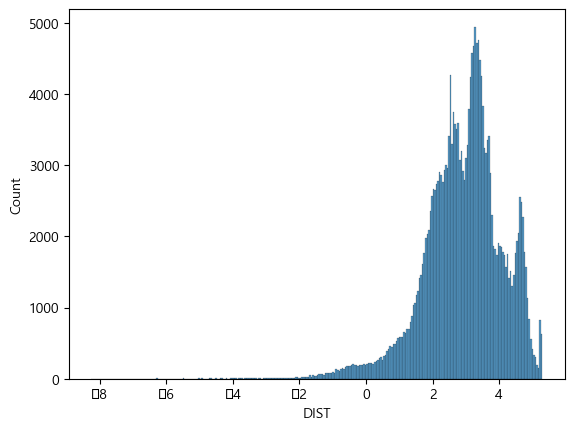

In [11]:
sns.histplot(np.log(df[df['DIST']!=0]['DIST']))

C:\Users\dohyeong\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='CI_HOUR', ylabel='Count'>

C:\Users\dohyeong\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\dohyeong\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


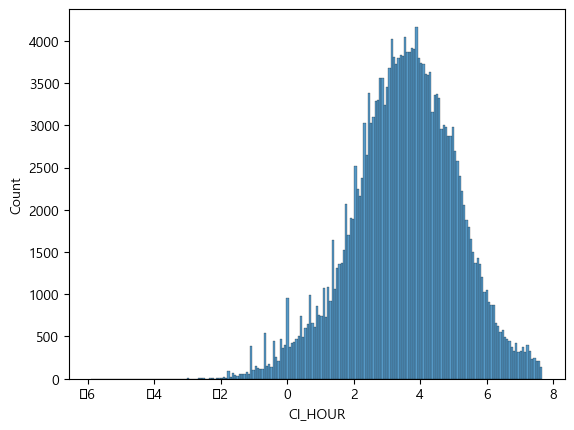

In [12]:
logci = np.log(df['CI_HOUR'])

sns.histplot(logci)

<Axes: xlabel='GT', ylabel='Count'>

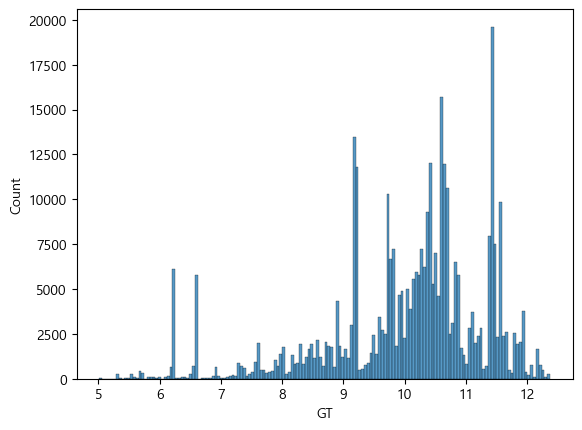

In [13]:
air_temp = np.log(df['GT'])

sns.histplot(air_temp)

In [14]:
print(df[df['DIST']!=0]['CI_HOUR'].mean())

print(df[df['DIST']==0]['CI_HOUR'].mean())

103.30825086272941
0.018270358107269347


In [17]:
df.loc[df['DIST']==0, 'd_zero'] = 1
df.loc[df['DIST']!=0, 'd_zero'] = 0